In [1]:
%matplotlib inline
import numpy as np
import scipy
from scipy.signal import butter, lfilter, freqz, find_peaks_cwt
import matplotlib.pyplot as plt

In [3]:
data_center = np.loadtxt('20180422_SQZ_OMC_Scan_OMC_ASC_ON_Center.txt')
data_close = np.loadtxt('20180422_SQZ_OMC_Scan_OMC_ASC_ON_Closest.txt')
data_furth = np.loadtxt('20180422_SQZ_OMC_Scan_OMC_ASC_ON_Furthest.txt')

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


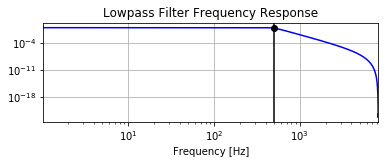

In [4]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 16384       # sample rate, Hz
cutoff = 500  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.loglog(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.loglog(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [96]:
font_labels=16

def applyFilt_plot(data, cutoff, fs, order, guess_peak_00, guess_peak_20 , title):
    # Filter the data, and plot both the original and filtered signals.
    y = butter_lowpass_filter(data[:,2], cutoff, fs, order)
    
    #guess the time of the peaks for 02 and 00
    sec1=round(guess_peak_00[0]*fs/8)
    sec2=round(guess_peak_00[1]*fs/8)
    peakind00=scipy.signal.find_peaks_cwt(y[sec1:sec2],np.arange(sec1/5000,sec2/5000))
    
    sec1_20=round(guess_peak_20[0]*fs/8)
    sec2_20=round(guess_peak_20[1]*fs/8)
    peakind20=scipy.signal.find_peaks_cwt(y[sec1_20:sec2_20],np.arange(sec1_20/5000,sec2_20/5000))
    
    TEM00 = "TEM00 Peak is "+str( round(max(y[peakind00+sec1]),4)  )
    TEM02 = "TEM02 Peak is "+str( round(max(y[peakind20+sec1_20]),4) )
    
    matching = "Mismatch Estimate is "+ str( round(1-(max(y[peakind20+sec1_20])/max(y[peakind00+sec1])) ,2))
    
    print(TEM00,TEM02,matching)
    
    fig = plt.figure(figsize=(8, 3),dpi=300)
    #ax = plt.subplot(211)
    ax2 = plt.subplot(111)
    
    #ax.plot(data[:,0],data[:,1])
    #ax.set_xlabel('Time [s]',fontsize=font_labels)
    #ax.set_ylabel('PZT [Volts]',fontsize=font_labels)
    #ax.set_xlim( data[round(sec1-(5*fs/8)),0],data[round(sec1+(10*fs/8)),0] )
    #ax.grid()

    ax2.semilogy(data[:,0], data[:,2], 'b-', label='Raw data')
    ax2.semilogy(data[:,0], y, 'g-', linewidth=2, label='Filtered data')
    
    ax2.plot(data[peakind00+sec1,0],y[peakind00+sec1],'ro', label='TEM00 Peaks')
    ax2.plot(data[peakind20+sec1_20,0],y[peakind20+sec1_20],'mo', label='TEM02 Peaks')
    
    ax2.set_xlabel('Time [s]',fontsize=font_labels)
    ax2.set_ylabel('OMC_DCPD_SUM [mW]',fontsize=font_labels)
    
    ax2.set_xlim( data[round(sec1-(5*fs/8)),0],data[round(sec1+(10*fs/8)),0] )
    ax2.set_ylim(1e-4,1e-1)
    
    ax2.grid()
    ax2.legend(loc=1)
    
    bbox_props = dict(boxstyle="round,pad=0.3", fc="cyan", ec="b", lw=2)
    
    plt.annotate(TEM00, xy=( data[round(sec1-(5*fs/8)),0] +.5, 0.07),bbox=bbox_props )
    plt.annotate(TEM02, xy=( data[round(sec1-(5*fs/8)),0] +.5, 0.03),bbox=bbox_props)
    plt.annotate(matching, xy=( data[round(sec1-(5*fs/8)),0]+.5 , 0.0125),bbox=bbox_props)
    plt.tight_layout()
    
    plt.savefig('../../../Figures/'+title+'.png')
    

TEM00 Peak is 0.0252 TEM02 Peak is 0.0034 Mismatch Estimate is 0.87


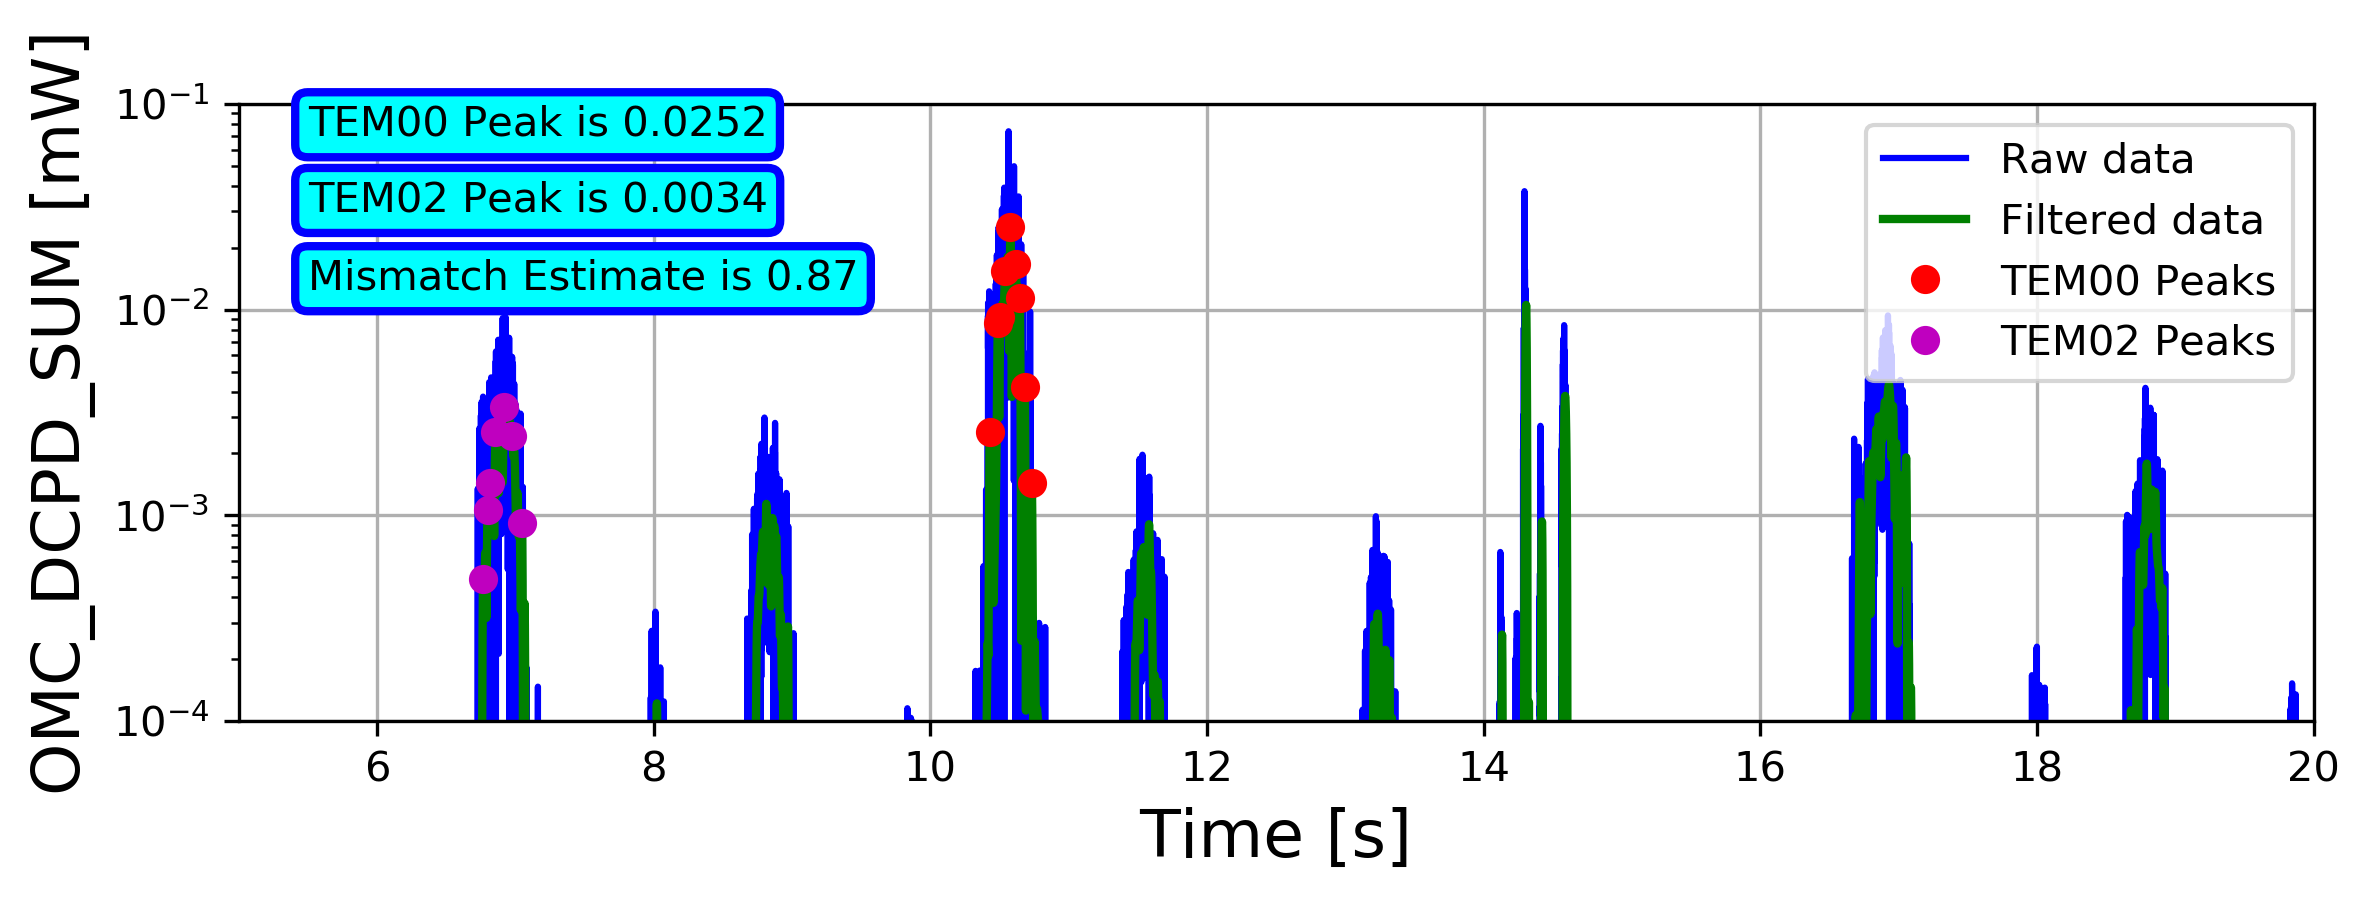

In [97]:
guess_peak_20=[6.5,7.5]
guess_peak_00=[10.,11.]
applyFilt_plot(data_center, cutoff, fs, order,guess_peak_00,guess_peak_20,'Lens_in_Center_Position')

TEM00 Peak is 0.0241 TEM02 Peak is 0.0029 Mismatch Estimate is 0.88


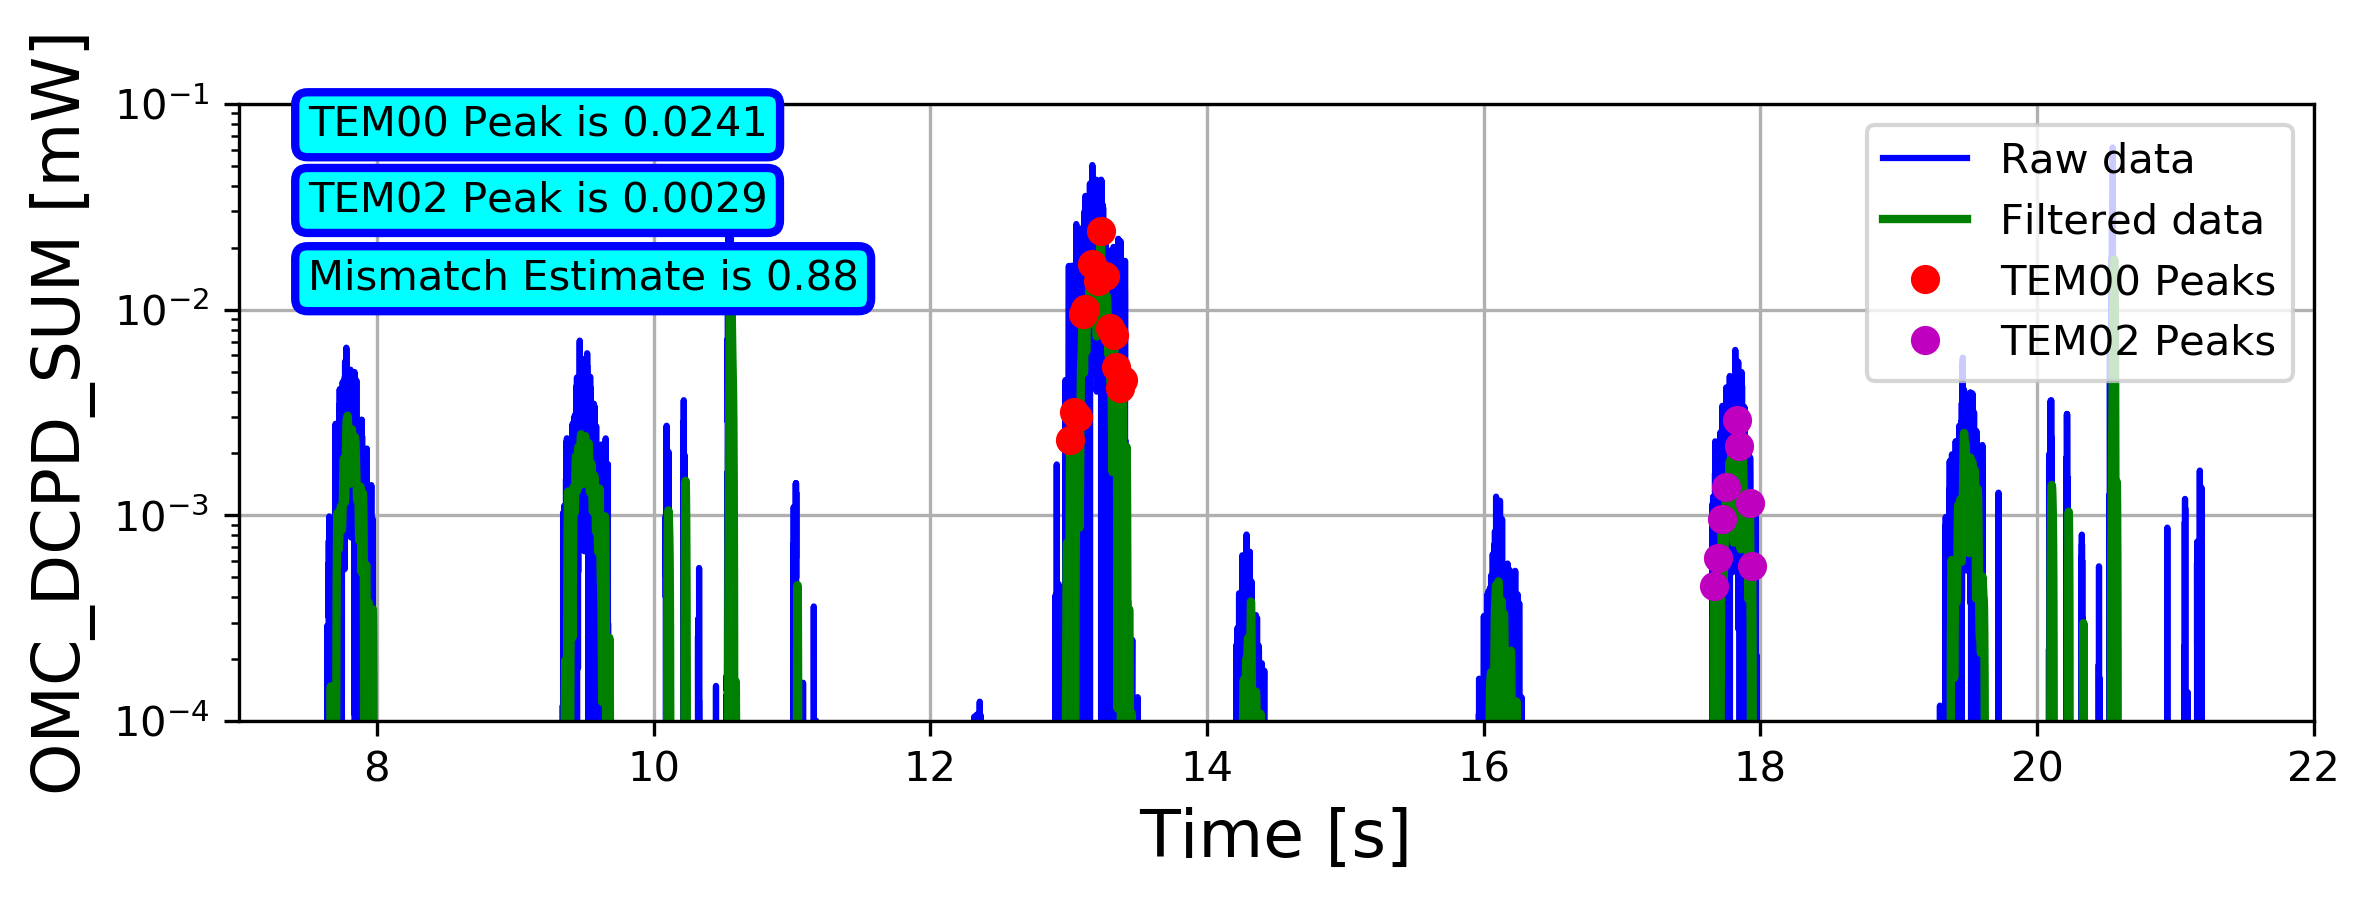

In [98]:
guess_peak_20=[17,19]
guess_peak_00=[12.,14]
applyFilt_plot(data_close, cutoff, fs, order,guess_peak_00,guess_peak_20,"Lens_Closest_to_OPO")

TEM00 Peak is 0.0143 TEM02 Peak is 0.0024 Mismatch Estimate is 0.83


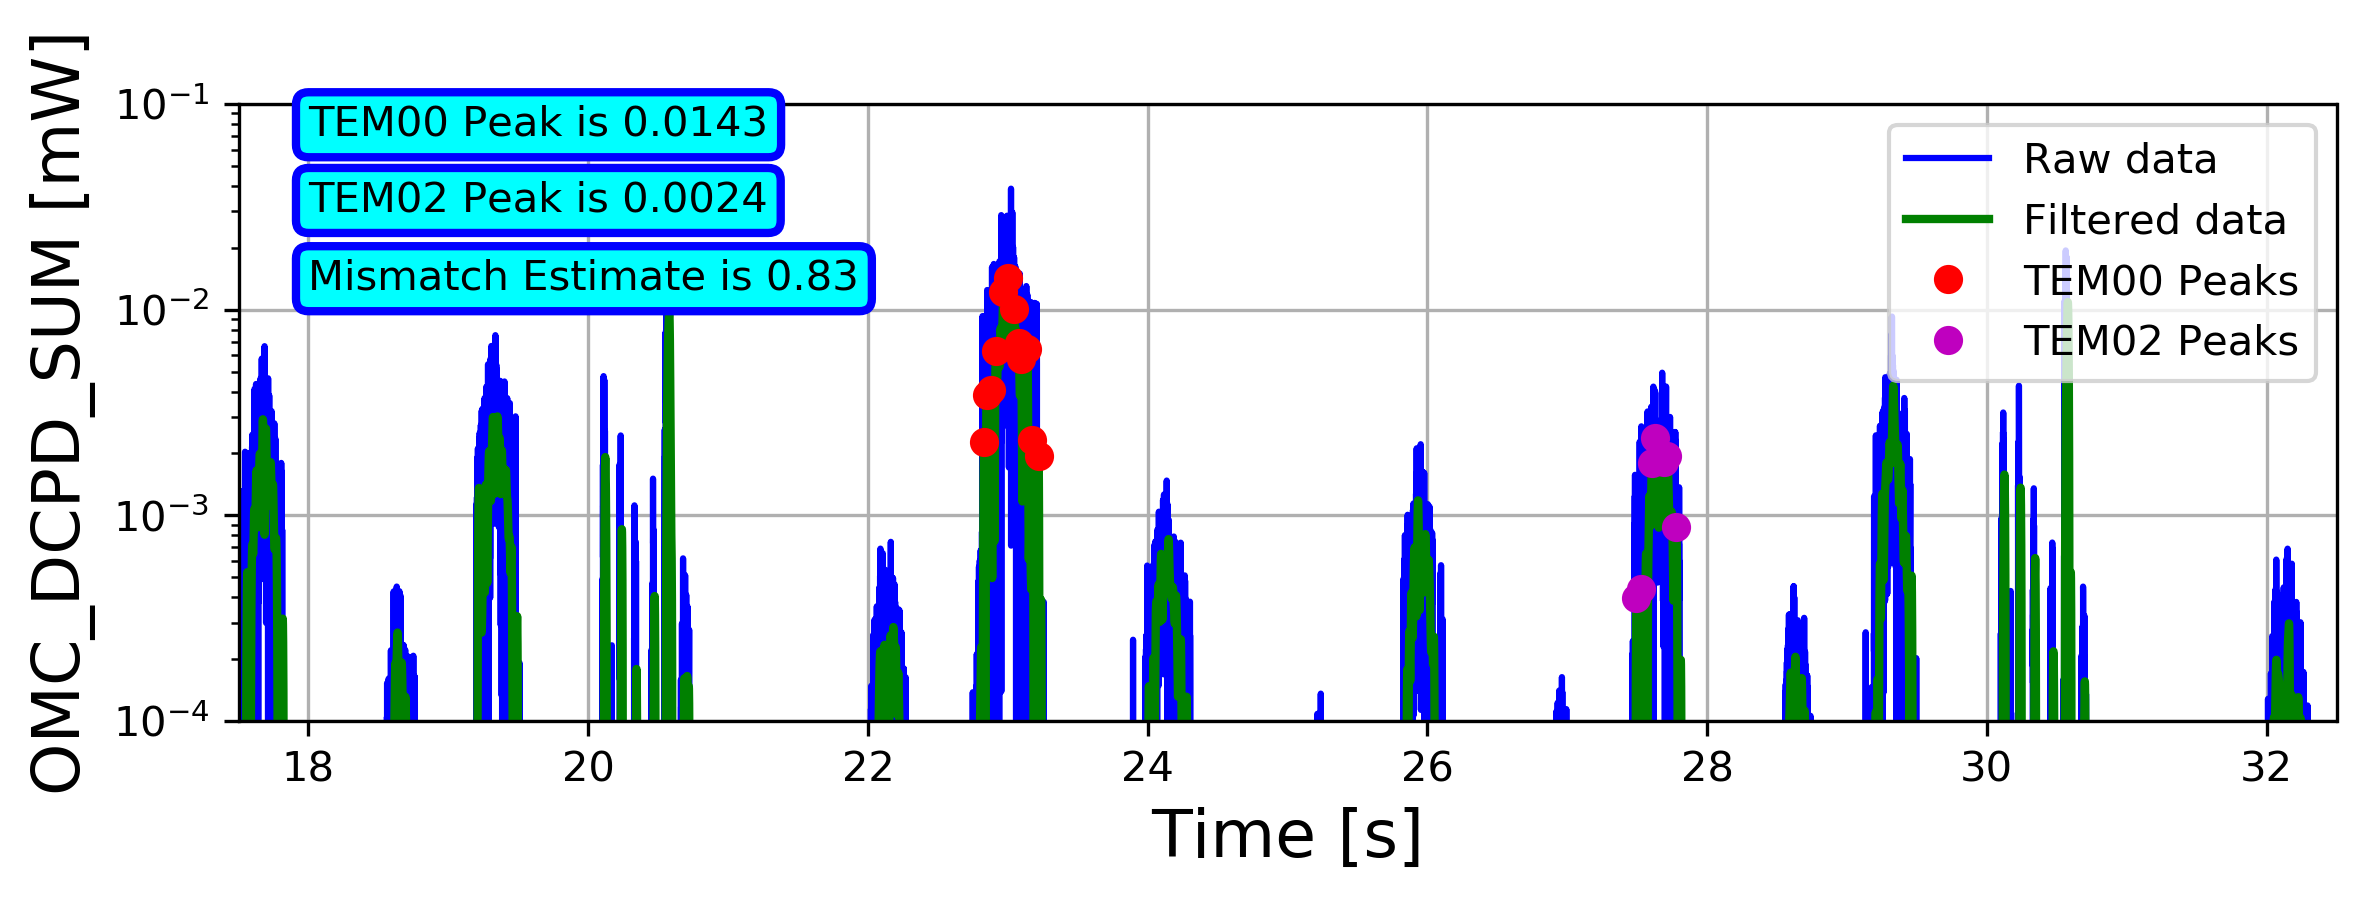

In [99]:
guess_peak_20=[27,28]
guess_peak_00=[22.5,23.5]
applyFilt_plot(data_furth, cutoff, fs, order,guess_peak_00,guess_peak_20, "Lens_Furthest_from_OPO")